# asteroseismology@unibo  - computer-based exercises
## propagation diagrams of stellar oscillation modes
7 April 2022


***
###  Familiarise yourself with propagation diagrams, trapping of modes at a given frequency

For a series of models along the evolution (e.g. PMS, MS, subgiant, RGB, core-He burning) of 2 $\rm M_\odot$ star (or models of any low- or intermediate-mass star!):


1. Plot the behaviour of the Lamb and Brunt-Väisälä frequencies and identify, depending on the frequency and the angular degree, in which regions of the models pressure and gravity oscillation modes are trapped.  

2. In particular, discuss the trapping of modes at a frequency:
    - corresponding to the approximate frequency of the fundamental pulsation mode ($\nu_{f}=\sqrt{\frac{GM}{R^3}}$)

    - corresponding to $\nu_{\rm max}$, the frequency where we expect maximum excitation of solar-like oscillations: $$\nu_{\rm max}=3090\, \frac{M/{\rm M_\odot}}{(R/{\rm R_\odot})^2\sqrt{T_{\rm eff}/T_{\rm eff,\odot}}}\mu{\rm Hz}$$ 
Do you expect the observed spectrum (i.e. for frequencies around $\nu_{\rm max}$ ) to be populated by p modes, g modes or mixed modes?


3. *Focussing on the MS models that you computed using differnt convective-core overshooting parameters, discuss if and how the Brunt-Väisälä frequency bears signature of the additional mixing processes.



In the models, remember that $N$ and $S_l$ are (unless explicitely stated) angular frequencies $\omega$ ($\omega=2\pi \nu$).





### Appendix: useful cells to read MESA files

### HRD

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [15]:
#this is just an example to get you started
dir_models='/Users/miglioa/astrosoft/MesaModels/tutorial_ov_eABG/LOGS/'
dir_models='/Users/miglioa/astrosoft/MesaModels/tutorial_1MsunMS//LOGS/'

filename=['history.data']

M1track = pd.read_csv(dir_models+filename[0], delim_whitespace = True, skiprows = 5)

#pd.set_option('max_columns', 100)

(M1track.head(1))

,model_number,elapsed_time,star_age,star_mass,effective_T,log_Teff,photosphere_L,photosphere_r,luminosity,radius,gravity,center_T,center_Rho,center_P,center_degeneracy,center_mu,center_ye,center_h1,center_he3,center_he4,center_c12,center_n14,center_o16,center_ne20,center_mg24,surface_h1,surface_he3,surface_he4,surface_c12,surface_n14,surface_o16,surface_ne20,surface_mg24,mass_conv_core,he_core_mass,he_core_radius,log_LH,log_LHe,log_LZ,log_extra_L,log_Lneu,log_abs_Lgrav,pp,cno,tri_alfa,c12_c12,delta_nu,delta_Pg,nu_max,log_L,...,burn_type_6,burn_qtop_6,burn_type_7,burn_qtop_7,burn_type_8,burn_qtop_8,burn_type_9,burn_qtop_9,burn_type_10,burn_qtop_10,burn_type_11,burn_qtop_11,burn_type_12,burn_qtop_12,burn_type_13,burn_qtop_13,burn_type_14,burn_qtop_14,burn_type_15,burn_qtop_15,burn_type_16,burn_qtop_16,burn_type_17,burn_qtop_17,burn_type_18,burn_qtop_18,burn_type_19,burn_qtop_19,burn_type_20,burn_qtop_20,burn_type_21,burn_qtop_21,burn_type_22,burn_qtop_22,burn_type_23,burn_qtop_23,burn_type_24,burn_qtop_24,burn_type_25,burn_qtop_25,burn_type_26,burn_qtop_26,burn_type_27,burn_qtop_27,burn_type_28,burn_qtop_28,burn_type_29,burn_qtop_29,burn_type_30,burn_qtop_30
0,1,0.106888,0.00001,1.0,4528.689235,3.655973,327.790202,29.41075,327.790202,29.41075,31.699719,299946.033781,0.000513,2.044007e+10,-8.024093,0.622566,0.850005,0.7,0.00003,0.27997,0.003447,0.00101,0.009381,0.002085,0.004077,0.7,0.00003,0.27997,0.003447,0.00101,0.009381,0.002085,0.004077,0.000025,0.0,0.0,-20.88247,-99.0,-99.0,-99.0,-22.280338,-99.0,-20.88247,-99.0,-99.0,-99.0,0.846507,0.0,4.047757,2.515596,...,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0,-9999,-1.0


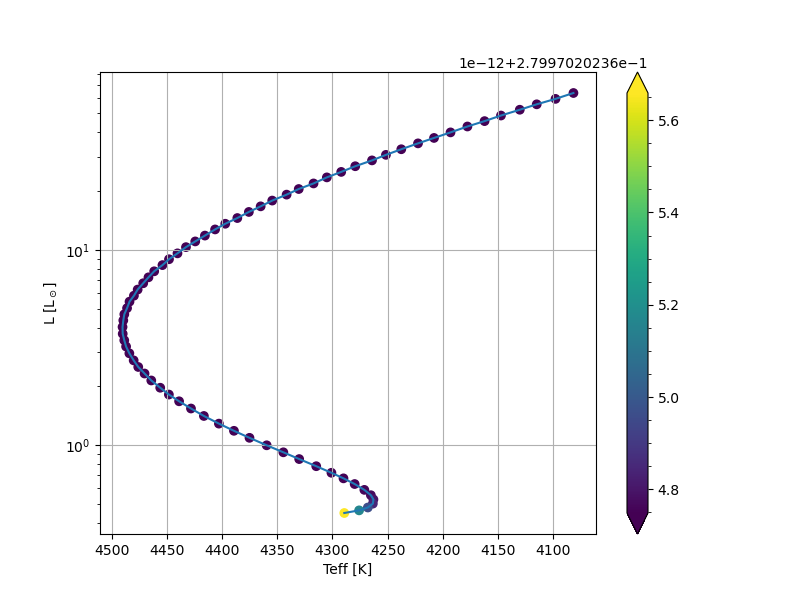

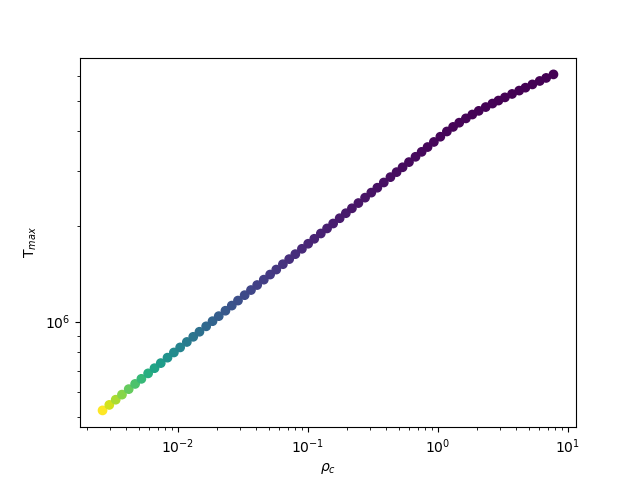

In [16]:
# add this line to generate interactive plots in the notebook
%matplotlib widget



fig = plt.figure(figsize=(8, 6))

Mtrack=M1track
M_sub=Mtrack[(Mtrack['luminosity']< 50000) & (Mtrack['model_number']> 100)]


plt.plot(M_sub['effective_T'],M_sub['luminosity'])
plt.gca().invert_xaxis()
plt.yscale('log')
#plt.xscale('log')
plt.scatter(M_sub['effective_T'],M_sub['luminosity'],c=M_sub['center_he4'])

plt.xlabel('Teff [K]')
plt.ylabel('L [L$_\odot$]');
plt.grid(True)

cbar = plt.colorbar(extend='both')
cbar.minorticks_on()

plt.figure()
plt.scatter(M_sub['center_Rho'],M_sub['max_T'],c=M_sub['luminosity'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\rho_c$')
plt.ylabel('T$_{max}$');



### Read the structure of a model

In [19]:
filename=['profile70.data']

M1 = pd.read_csv(dir_models+filename[0], delim_whitespace = True, skiprows = 5)
print(M1.head(2))

   mass    q    radius    logRho  temperature  luminosity      pressure  \
0   1.0  1.0  1.295016 -6.934654  5762.876840    1.663368  42649.567472   
1   1.0  1.0  1.295014 -6.931477  5768.969479    1.663368  43008.138154   

           pgas          grav  eps_grav  net_nuclear_energy  \
0  42646.785920  16349.982953       0.0                 0.0   
1  43005.344821  16350.043824       0.0                 0.0   

   eps_nuc_plus_nuc_neu  velocity         csound        eta        mu  \
0          1.773762e-26       0.0  775569.457431 -18.953601  1.305972   
1          1.786786e-26       0.0  775928.949671 -18.940594  1.305969   

      gradT     grada     gradr  mixing_type  mlt_mixing_type  \
0  0.125238  0.388659  0.125238            0                0   
1  0.126160  0.388572  0.126160            0                0   

   mlt_mixing_length     gradL  log_D_mix  pressure_scale_height  \
0       4.488292e+07  0.388659      -99.0               0.000323   
1       4.490397e+07  0.388621  

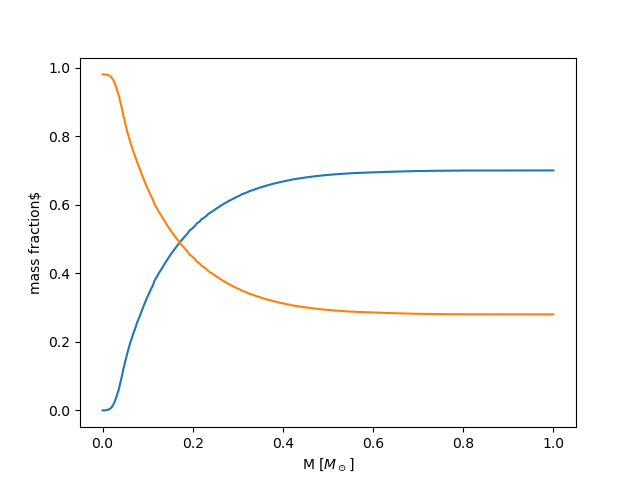

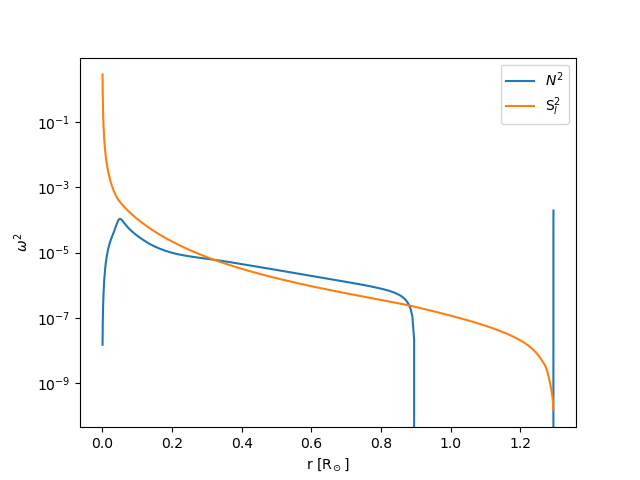

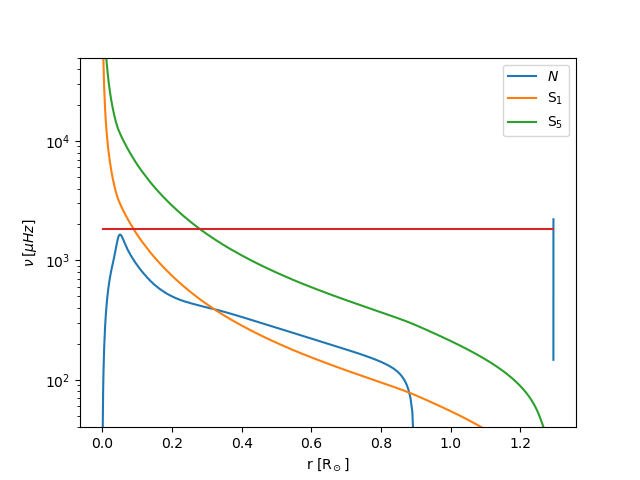

In [21]:
%matplotlib widget
Rsun=6.957e10 # cm
Teffsun=5777 # K

# just a plot with chemical composition 
M=M1
plt.figure()
plt.plot(M['mass'],M['x_mass_fraction_H'],label='X')
plt.plot(M['mass'],M['y_mass_fraction_He'],label='Y')
plt.xlabel('M $[M_\odot]$')
plt.ylabel('mass fraction$')

# prop diagram

plt.figure()

# angular degree
l=1

plt.plot(M['radius'],(M['brunt_N2']),label='$N^2$')
plt.plot(M['radius'],(l*(l+1))*M['csound']**2/(M['radius']*Rsun)**2,label='S$_l^2$')
#plt.plot(M['mass'],M['z_mass_fraction_metals'],label='Z')



plt.yscale('log')
#plt.xscale('log')


plt.xlabel('r [R$_\odot$]')
plt.ylabel('$\omega^2$')
plt.legend()

plt.figure()


M['NmuHz']=((M['brunt_N2']))**0.5*1e6/2/math.pi
l=1
M['SlmuHz']=((l*(l+1))*M['csound']**2/(M['radius']*Rsun)**2)**0.5*1e6/2/math.pi

x=M['radius']
plt.plot(x,M['NmuHz'],label='$N$')
plt.plot(x,M['SlmuHz'],label='S$_1$')
l=5
M['SlmuHz']=((l*(l+1))*M['csound']**2/(M['radius']*Rsun)**2)**0.5*1e6/2/math.pi
plt.plot(x,M['SlmuHz'],label='S$_5$')
plt.ylim([40, 50000])
plt.yscale('log')
#plt.xscale('log')


plt.xlabel('r [R$_\odot$]')
plt.ylabel('$\\nu    \, [\mu Hz]$')

# compute numax (assuming outermost point in the model is the photopshere)
numax=3090*M['mass'][0]/(M['radius'][0])**2/(M['temperature'][0]/Teffsun)**0.5
plt.plot([np.min(x),np.max(x)],[numax,numax])
plt.legend()

In [8]:
numax

3213.949491681882